# Understanding classiication

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import numpy as np
sns.set_theme(palette='colorblind') # this improves contrast


from sklearn.metrics import confusion_matrix, classification_report

In [2]:
iris_df = sns.load_dataset('iris')

In [3]:
# dataset vars:
# 'petal_width',  'sepal_length','species', 'sepal_width','petal_length',
feature_vars = ['petal_width','sepal_length', 'sepal_width','petal_length']
target_var = 'species'
X_train, X_test, y_train, y_test = train_test_split(iris_df[feature_vars],iris_df[target_var],random_state=3)

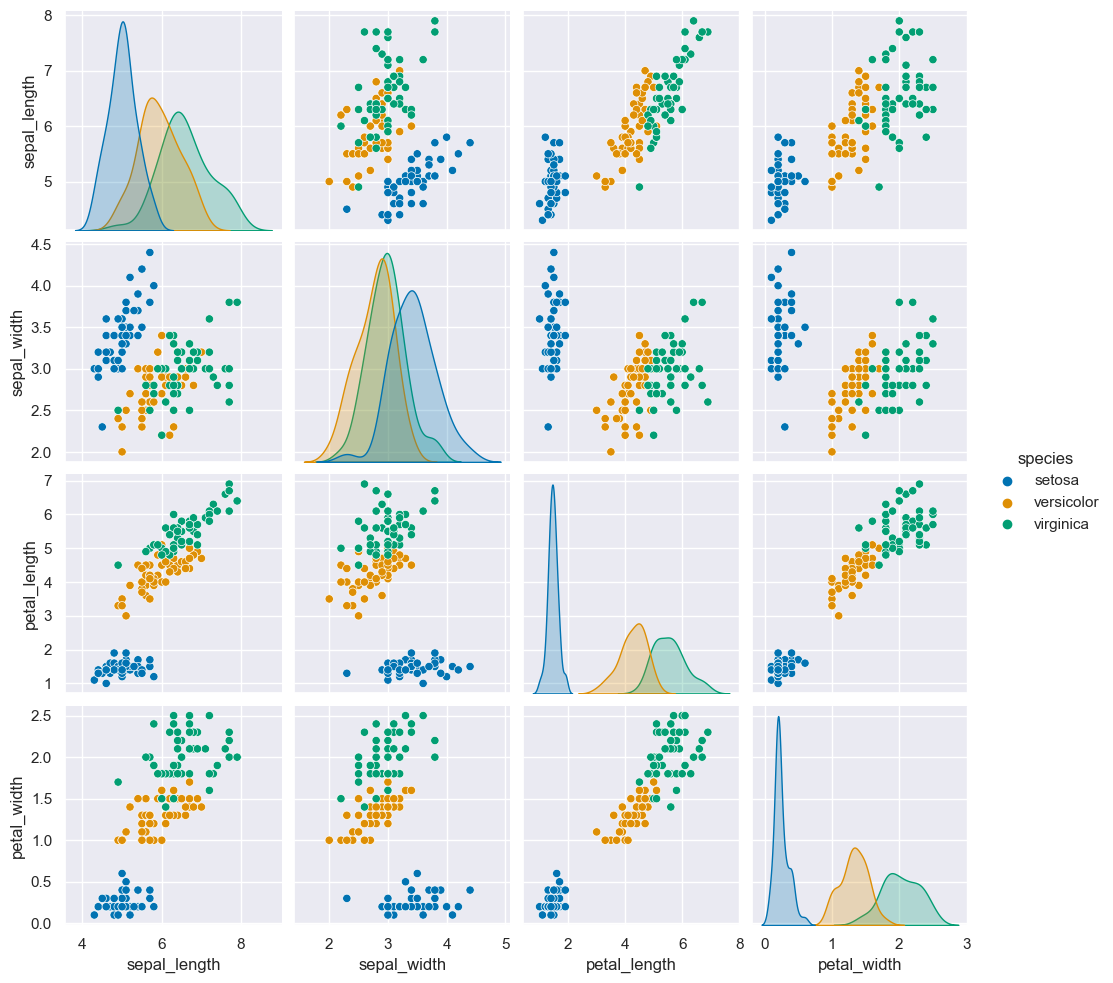

In [4]:
sns.pairplot(data= iris_df, hue='species')

In [5]:
gnb = GaussianNB()

In [6]:
gnb.fit(X_train,y_train)

GaussianNB()

In [7]:
y_pred = gnb.predict(X_test)

In [8]:
gnb.score(X_test,y_test)

0.9736842105263158

In [9]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.92      0.96        12
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [10]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 11]], dtype=int64)

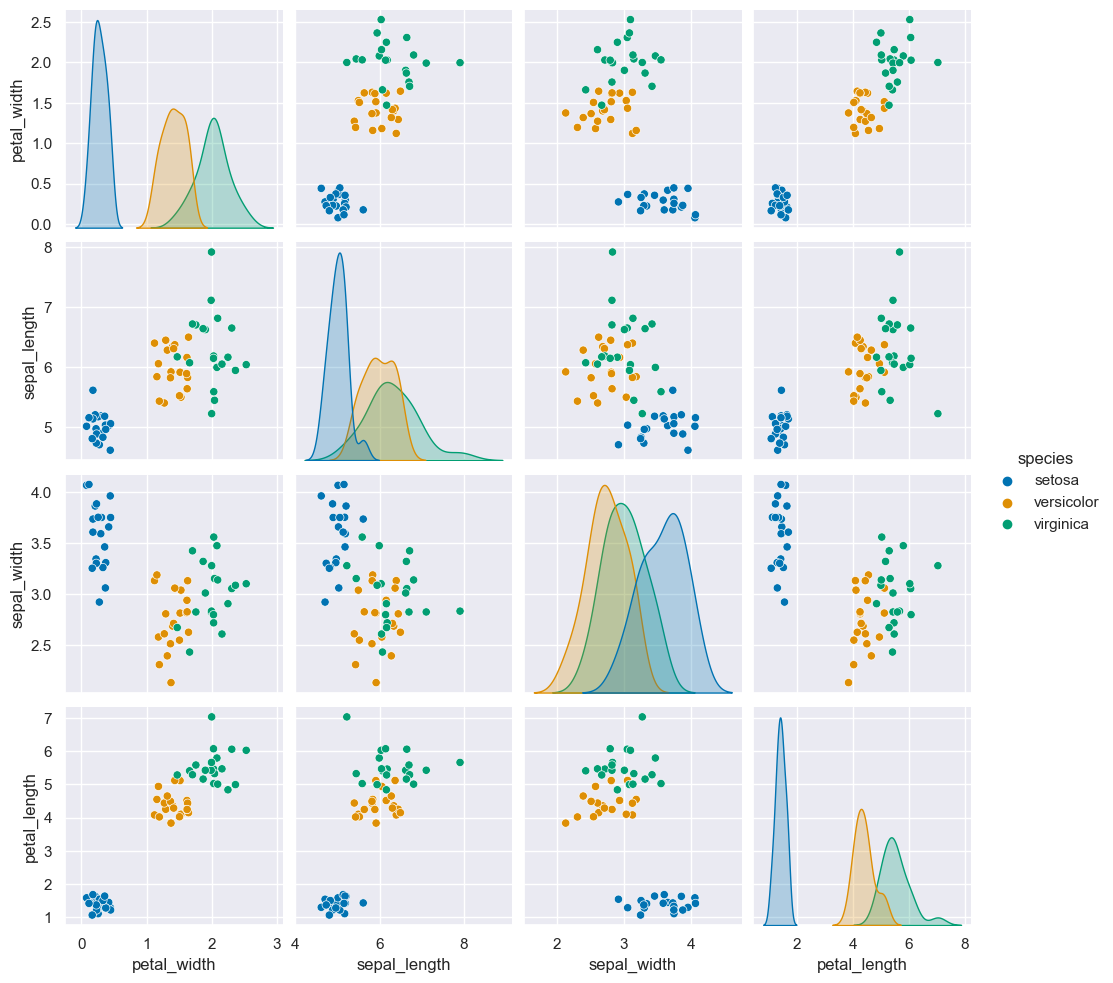

In [12]:
N = 20
gnb_df = pd.DataFrame(np.concatenate([np.random.multivariate_normal(th, sig*np.eye(4),N)
                 for th, sig in zip(gnb.theta_,gnb.var_)]),
                 columns = gnb.feature_names_in_)
gnb_df['species'] = [ci for cl in [[c]*N for c in gnb.classes_] for ci in cl]
sns.pairplot(data =gnb_df, hue='species')

In [13]:
gnb.predict_proba(X_test)

array([[1.00000000e+000, 3.10850430e-018, 9.83936388e-027],
       [1.00000000e+000, 2.17607686e-017, 6.11974996e-026],
       [1.00000000e+000, 2.45846863e-014, 9.60562575e-023],
       [1.00000000e+000, 4.29382017e-016, 8.65569962e-025],
       [1.00000000e+000, 5.49915897e-016, 2.38180484e-023],
       [1.99870101e-311, 1.36174299e-013, 1.00000000e+000],
       [2.69395984e-069, 9.99960647e-001, 3.93530354e-005],
       [1.00000000e+000, 1.40826499e-017, 5.89539964e-026],
       [1.08156958e-173, 1.40618746e-003, 9.98593813e-001],
       [2.90745994e-094, 9.75192625e-001, 2.48073750e-002],
       [5.39591648e-072, 9.99825700e-001, 1.74300433e-004],
       [1.00000000e+000, 5.38453222e-018, 1.35082184e-026],
       [1.30426983e-066, 9.99973771e-001, 2.62288452e-005],
       [6.11553492e-070, 9.99973058e-001, 2.69419127e-005],
       [2.01494877e-214, 4.34577051e-009, 9.99999996e-001],
       [1.00000000e+000, 5.75883870e-018, 2.19570953e-026],
       [1.15708888e-120, 9.13375722e-001

In [14]:
# make the probabilities into a dataframe labeled with classes & make the index a separate column
prob_df = pd.DataFrame(data = gnb.predict_proba(X_test), columns = gnb.classes_ ).reset_index()
# add the predictions
prob_df['predicted_species'] = y_pred
prob_df['true_species'] = y_test.values
# for plotting, make a column that combines the index & prediction
pred_text = lambda r: str( r['index']) + ',' + r['predicted_species']
prob_df['i,pred'] = prob_df.apply(pred_text,axis=1)
# same for ground truth
true_text = lambda r: str( r['index']) + ',' + r['true_species']
prob_df['correct'] = prob_df['predicted_species'] == prob_df['true_species']
# a dd a column for which are correct
prob_df['i,true'] = prob_df.apply(true_text,axis=1)
prob_df_melted = prob_df.melt(id_vars =[ 'index', 'predicted_species','true_species','i,pred','i,true','correct'],value_vars = gnb.classes_,
                             var_name = target_var, value_name = 'probability')
prob_df_melted.head()

,index,predicted_species,true_species,"i,pred","i,true",correct,species,probability
0,0,setosa,setosa,"0,setosa","0,setosa",True,setosa,1.0
1,1,setosa,setosa,"1,setosa","1,setosa",True,setosa,1.0
2,2,setosa,setosa,"2,setosa","2,setosa",True,setosa,1.0
3,3,setosa,setosa,"3,setosa","3,setosa",True,setosa,1.0
4,4,setosa,setosa,"4,setosa","4,setosa",True,setosa,1.0


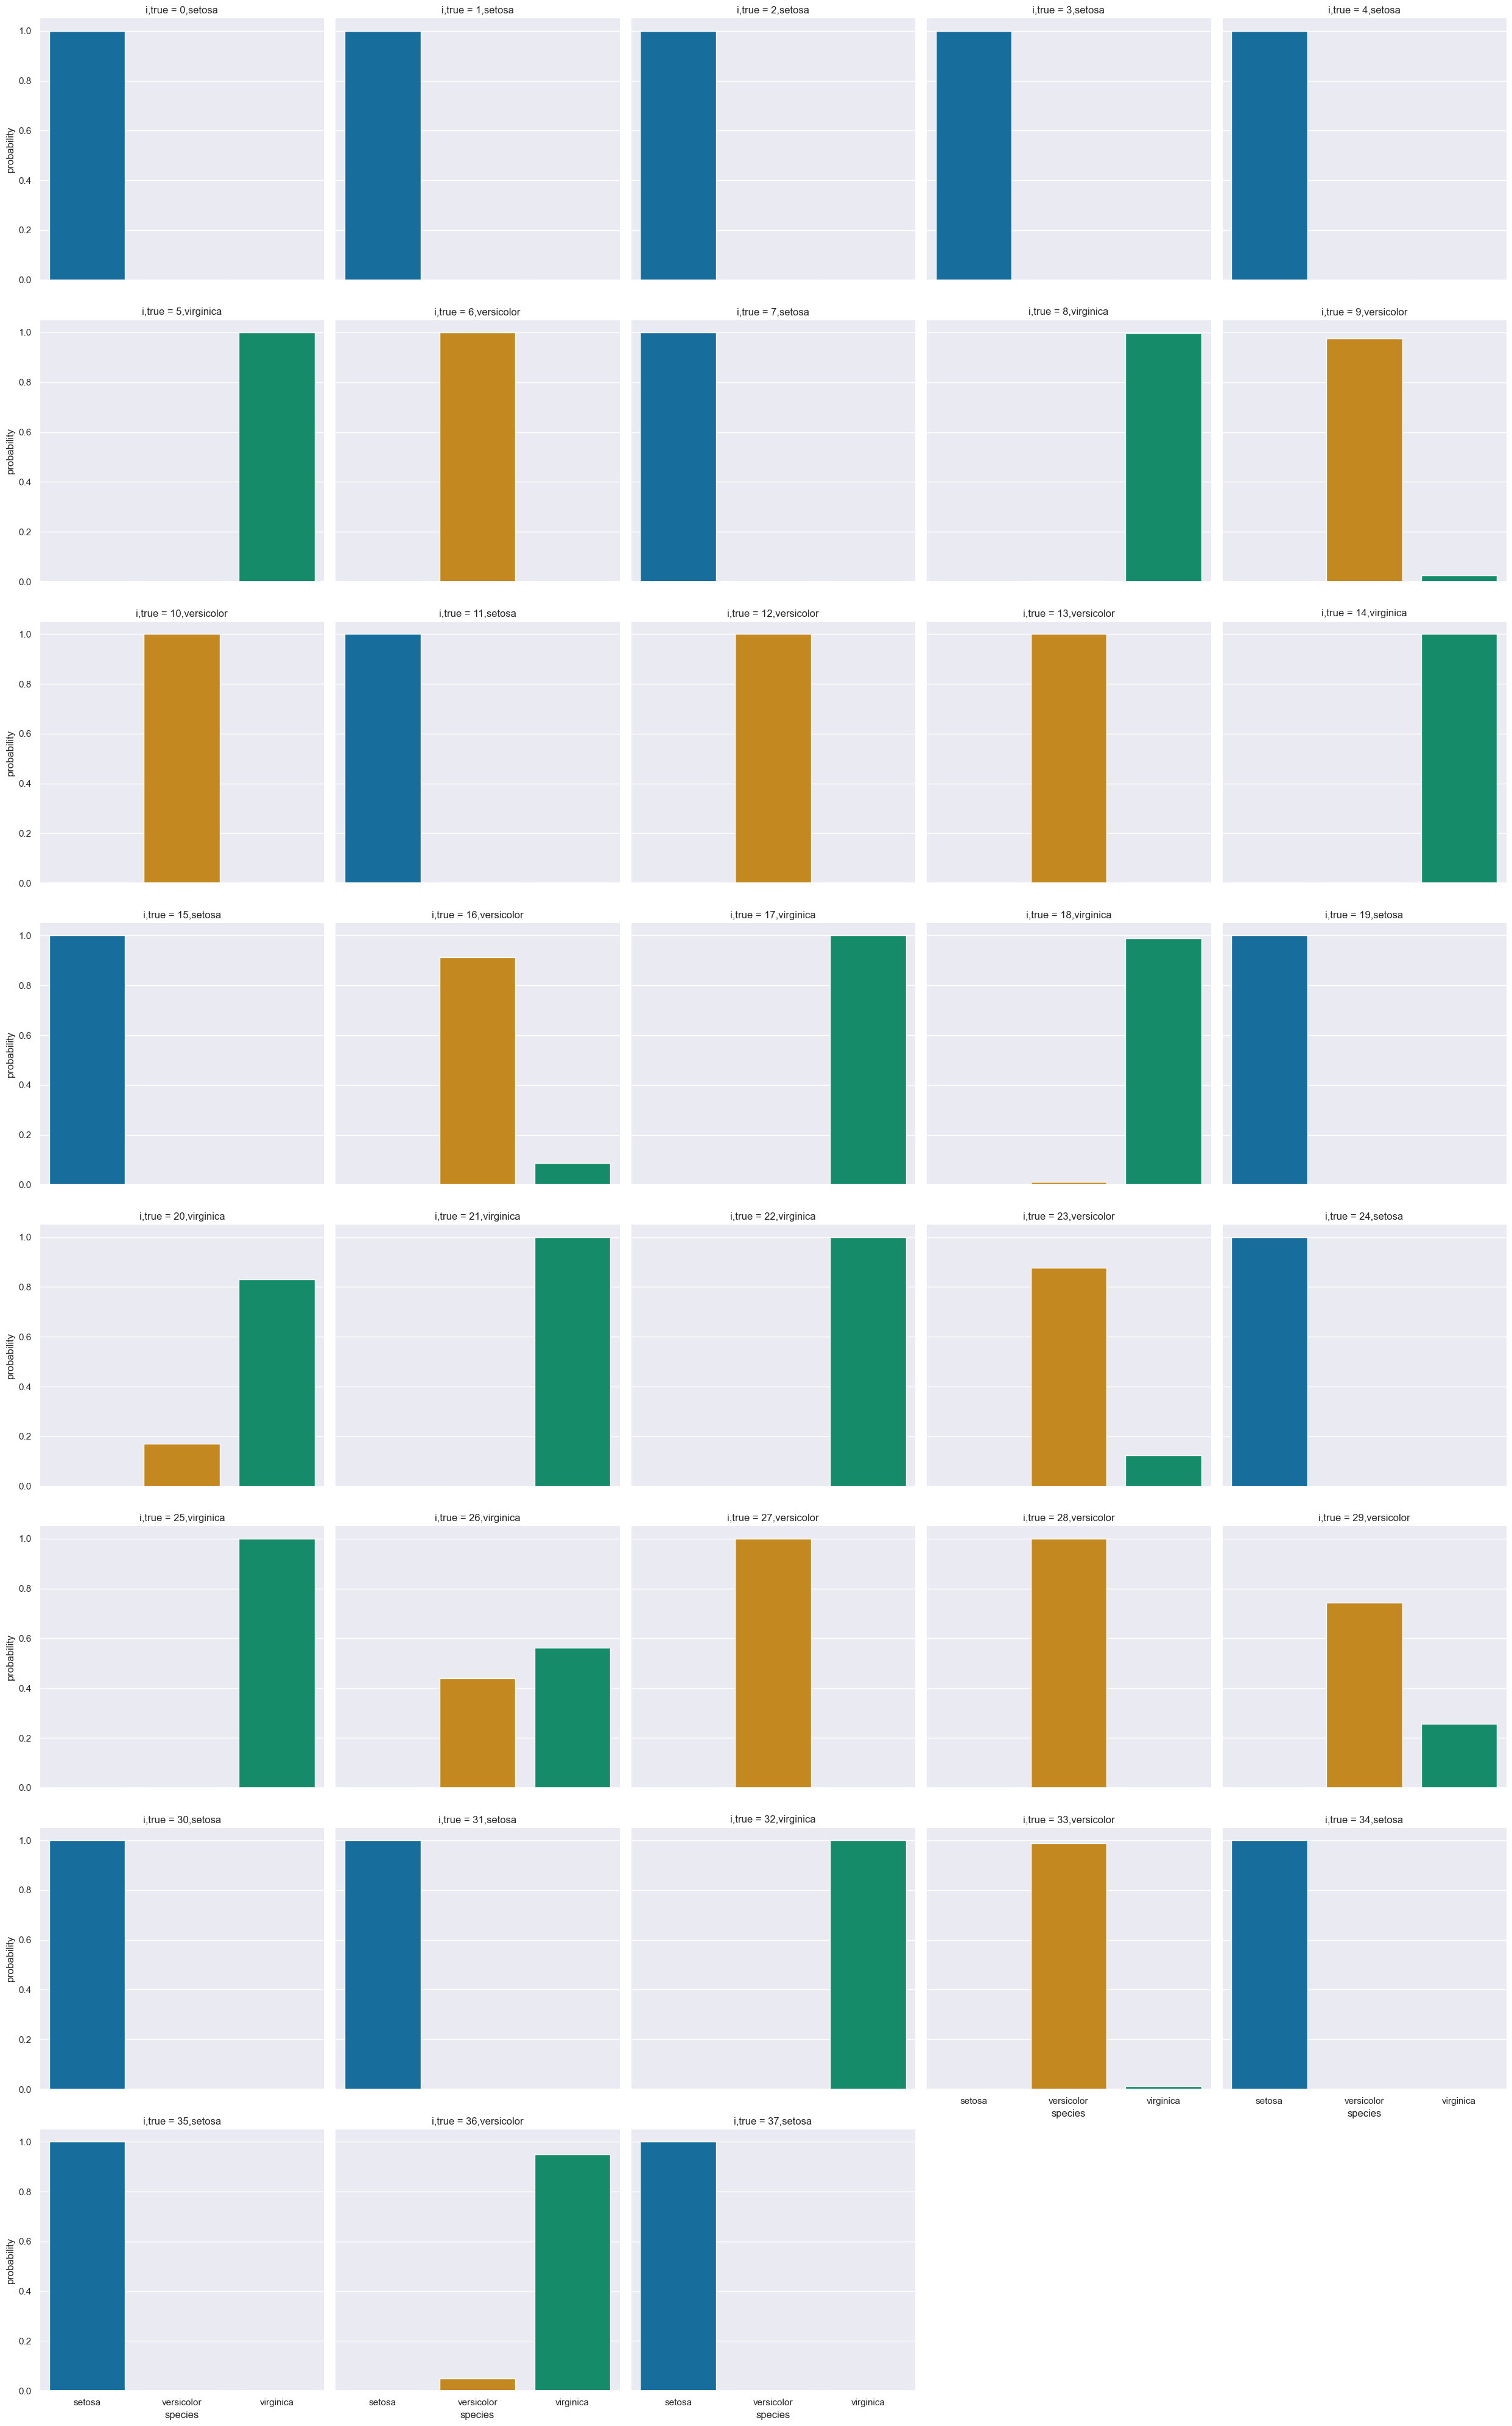

In [15]:
# plot a bar graph for each point labeled with the prediction
sns.catplot(data =prob_df_melted, x = 'species', y='probability' ,col ='i,true',
            col_wrap=5,kind='bar')

In [16]:
corner_data = 'https://raw.githubusercontent.com/rhodyprog4ds/06-naive-bayes/f425ba121cc0c4dd8bcaa7ebb2ff0b40b0b03bff/data/dataset6.csv'
df6= pd.read_csv(corner_data,usecols=[1,2,3])

In [17]:
df6.head(1)

,x0,x1,char
0,6.14,2.1,B


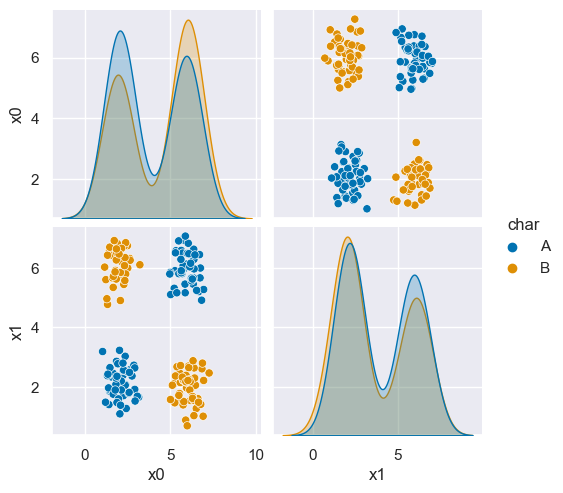

In [18]:
sns.pairplot(data=df6, hue='char',hue_order=['A','B'])


In [20]:
feature_vars = ['x0','x1']
target_var = 'char'
X_train, X_test, y_train, y_test = train_test_split(df6[feature_vars],df6[target_var],random_state=4)

In [26]:
gnb_corners = GaussianNB()
gnb_corners.fit(X_train,y_train)
gnb_corners.score(X_test, y_test)

0.72

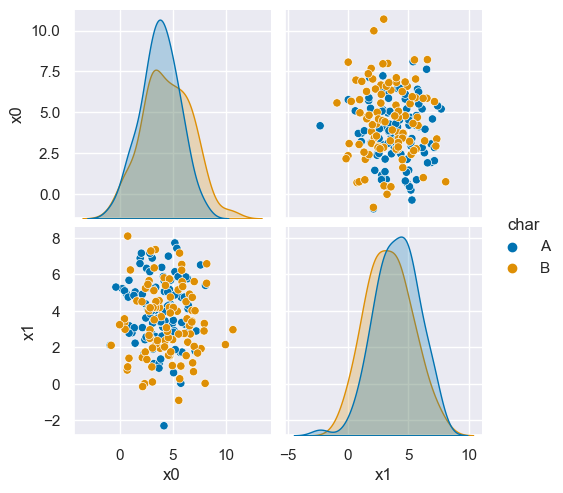

In [27]:
N = 100
gnb_df = pd.DataFrame(np.concatenate([np.random.multivariate_normal(th, sig*np.eye(2),N)
         for th, sig in zip(gnb_corners.theta_,gnb_corners.var_)]),
         columns = ['x0','x1'])
gnb_df['char'] = [ci for cl in [[c]*N for c in gnb_corners.classes_] for ci in cl]

sns.pairplot(data =gnb_df, hue='char',hue_order=['A','B'])

In [28]:
df6_pred = X_test.copy()
df6_pred['pred'] = gnb_corners.predict(X_test)

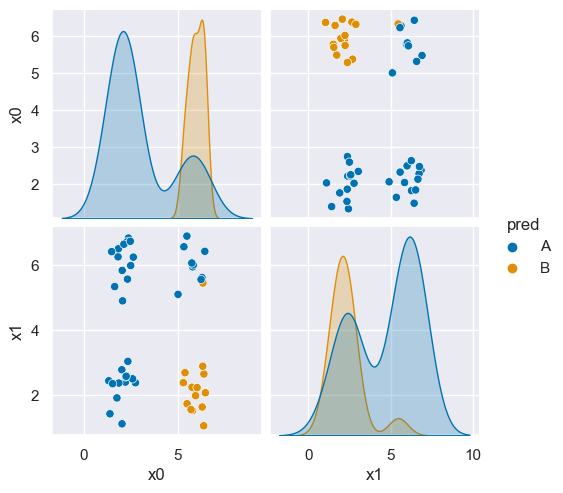

In [30]:
sns.pairplot(data=df6_pred, hue='pred',hue_order=['A','B'])

In [31]:
dt = tree.DecisionTreeClassifier()

In [32]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
dt.score(X_test,y_test)

1.0

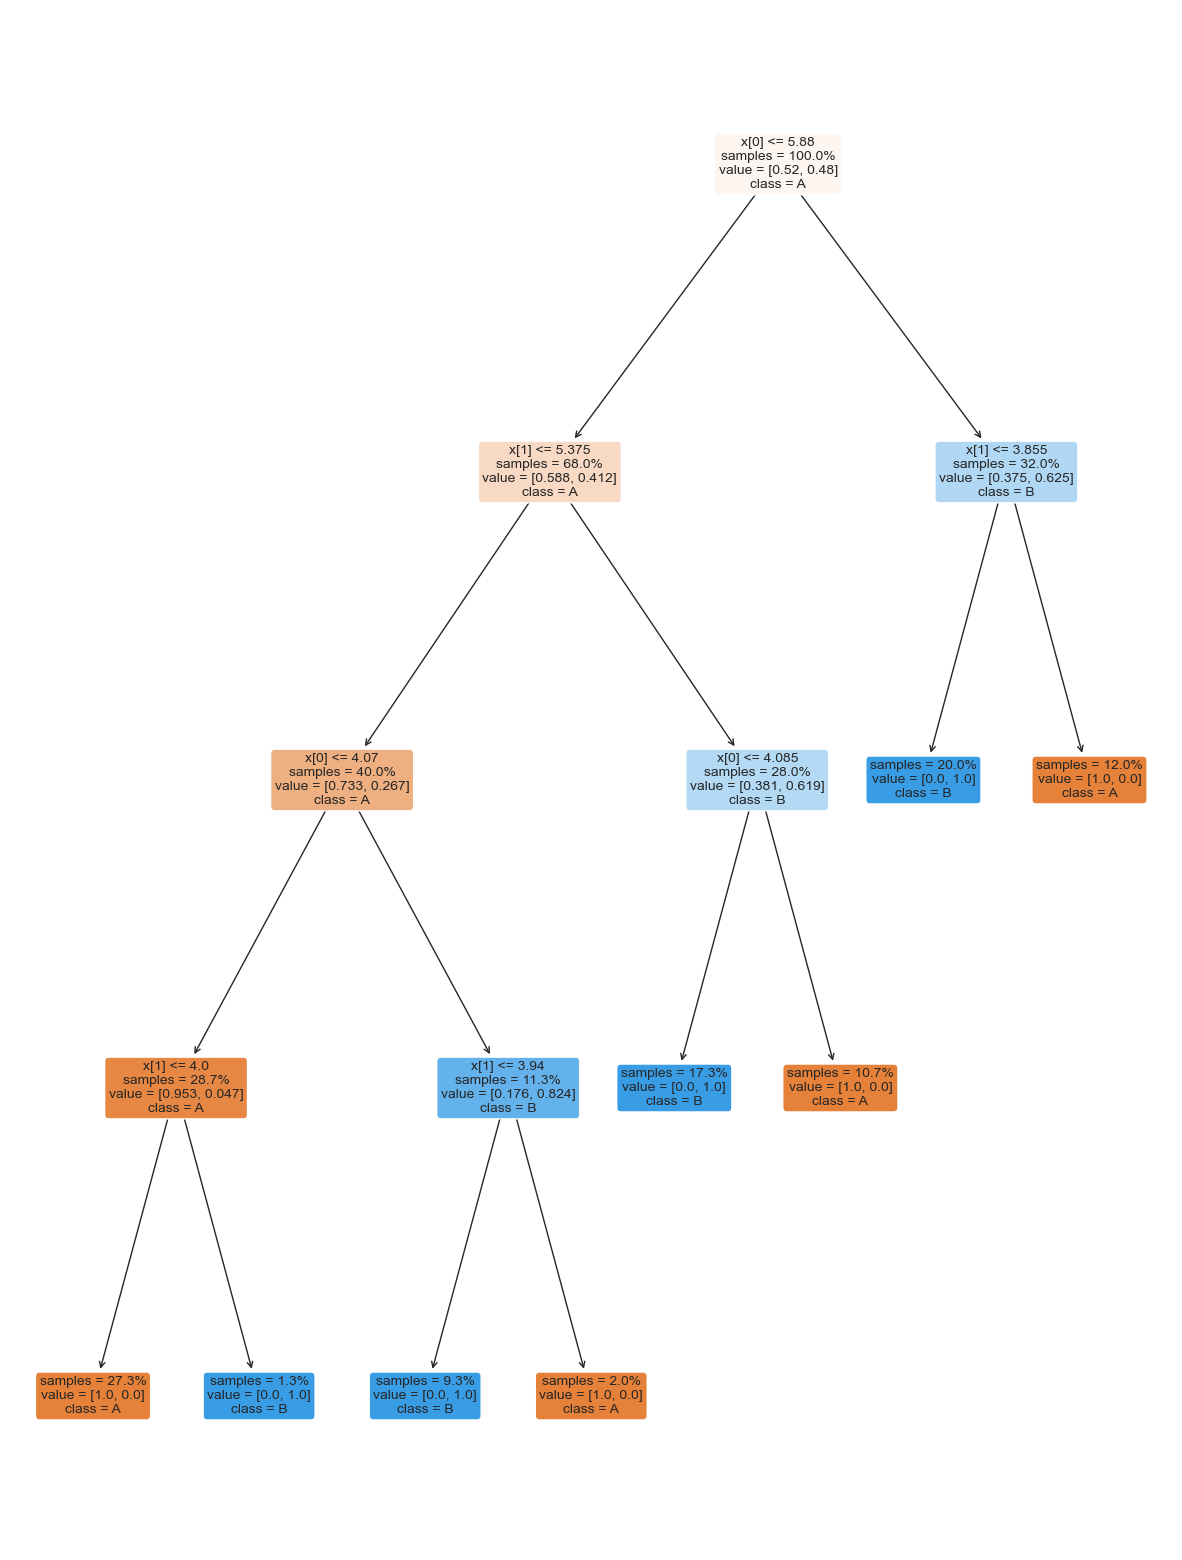

In [36]:
plt.figure(figsize=(15,20))
tree.plot_tree(dt, rounded =True, class_names = ['A','B'],
      proportion=True, filled =True, impurity=False,fontsize=10);